# Data Exploration of Myocardial Infarction Dataset

**Setup**

In [2]:
#imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#### Exploring the tabular data 

In [ ]:
# read in data 
df_to_explore = pd.read_csv('../data:/training_data/mixed_demographics.csv')
df_to_explore.head()
#TRUE = MALE FALSE = FEMALE

,Unnamed: 0,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex
0,0,healthy,62.593012,25.312186,161.647749,64.949107,76.057670,137.765801,False
1,1,healthy,58.037959,32.100795,172.543391,94.715477,84.272113,143.459426,False
2,2,pMI,65.840496,26.099055,166.521430,71.650562,75.340419,137.100866,False
3,3,pMI,68.518300,27.672836,166.176884,75.779414,75.697258,140.518093,True
4,4,healthy,55.591381,27.266429,161.314821,70.185424,79.973837,133.740780,False


In [20]:
# get some basic info on the dataframe
df_to_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    900 non-null    int64  
 1   MI            900 non-null    object 
 2   age           900 non-null    float64
 3   BMI           900 non-null    float64
 4   height        900 non-null    float64
 5   weight        900 non-null    float64
 6   diastolic_BP  900 non-null    float64
 7   systolic_BP   900 non-null    float64
 8   sex           900 non-null    bool   
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 57.3+ KB


In [21]:
df_to_explore.isnull().sum()

Unnamed: 0      0
MI              0
age             0
BMI             0
height          0
weight          0
diastolic_BP    0
systolic_BP     0
sex             0
dtype: int64

there are no null values in the data set 

In [53]:
df_to_explore["sex"] = df_to_explore["sex"].replace({True: "Male", False: "Female"})
df_to_explore.head()

,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex
0,healthy,62.593012,25.312186,161.647749,64.949107,76.057670,137.765801,Female
1,healthy,58.037959,32.100795,172.543391,94.715477,84.272113,143.459426,Female
2,pMI,65.840496,26.099055,166.521430,71.650562,75.340419,137.100866,Female
3,pMI,68.518300,27.672836,166.176884,75.779414,75.697258,140.518093,Male
4,healthy,55.591381,27.266429,161.314821,70.185424,79.973837,133.740780,Female


In [13]:
# check for duplicate rows in the dataframe
#keep first means that it won't return the first instance of the duplicate in the list of indices 
indexes = df_to_explore.duplicated(keep=False)

#identifies all 'True' values in the series indexes and returns their index 
duplicates_indices = indexes[indexes].index.values

#prints all duplicate columns for visual checking
df_to_explore.iloc[duplicates_indices]

,Unnamed: 0,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex


In [22]:
df_to_explore.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,900.0,449.500000,259.951919,0.000000,224.750000,449.500000,674.250000,899.000000
age,900.0,64.111860,2.547381,55.591381,62.219253,64.104358,65.858591,74.011208
BMI,900.0,27.619373,1.820852,19.852576,26.414552,27.654454,28.931890,33.291264
height,900.0,169.691638,4.024141,157.371195,167.063936,169.732035,172.411495,182.634448
weight,900.0,79.180642,7.017943,55.985157,73.972783,79.643591,84.443475,98.216702
diastolic_BP,900.0,78.498092,2.571678,70.409270,76.895646,78.367708,80.274086,86.616991
systolic_BP,900.0,138.327642,3.627310,124.172508,136.111341,138.169542,140.637043,149.831843


In [23]:
#drops unnamed: 0 column as this is just an index column

df_to_explore.drop(labels = ["Unnamed: 0"], axis=1, inplace=True)
df_to_explore.head()

,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex
0,healthy,62.593012,25.312186,161.647749,64.949107,76.057670,137.765801,False
1,healthy,58.037959,32.100795,172.543391,94.715477,84.272113,143.459426,False
2,pMI,65.840496,26.099055,166.521430,71.650562,75.340419,137.100866,False
3,pMI,68.518300,27.672836,166.176884,75.779414,75.697258,140.518093,True
4,healthy,55.591381,27.266429,161.314821,70.185424,79.973837,133.740780,False


In [28]:
#creates vector of numeric feature columns
numeric_feature_columns = df_to_explore.select_dtypes(include=np.number).columns.tolist()
numeric_feature_columns 

['age', 'BMI', 'height', 'weight', 'diastolic_BP', 'systolic_BP']

##### Plots

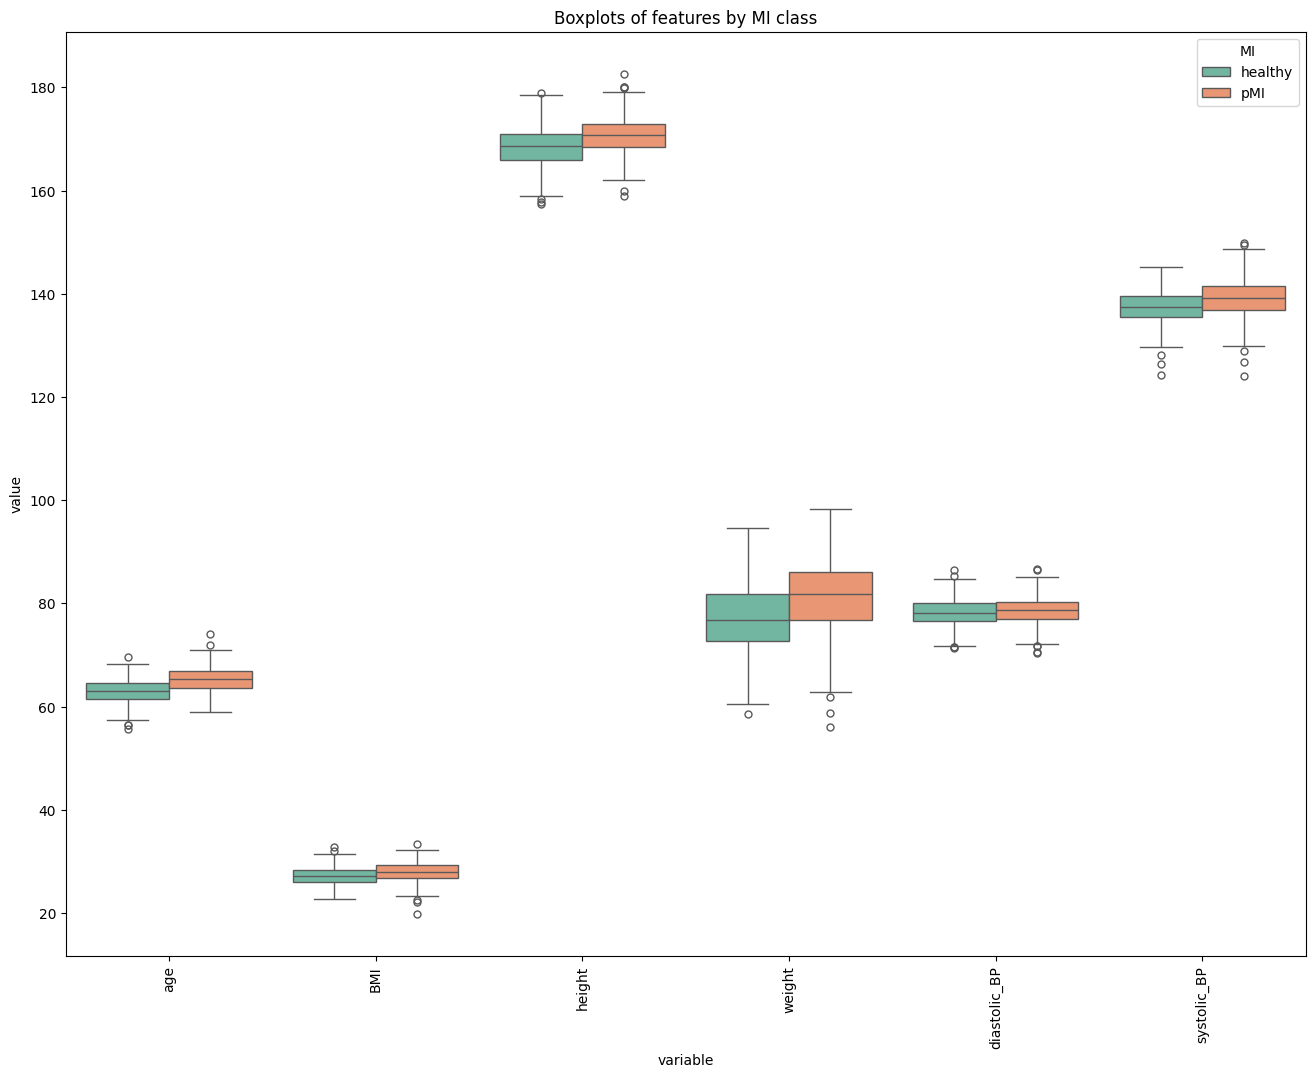

In [37]:
plt.figure(figsize=(16,12))
sns.boxplot(
    x="variable",
    y="value",
    hue="MI",
    data=df_to_explore.melt(id_vars="MI", value_vars=numeric_feature_columns),
    fliersize=5,
    palette="Set2"
)
plt.xticks(rotation=90)
plt.title("Boxplots of features by MI class")
plt.legend(title="MI")
plt.show()

In [40]:
#correlation between sex and condition
pd.crosstab(df_to_explore['MI'], df_to_explore['sex'])


sex,False,True
MI,,
healthy,250,202
pMI,88,360


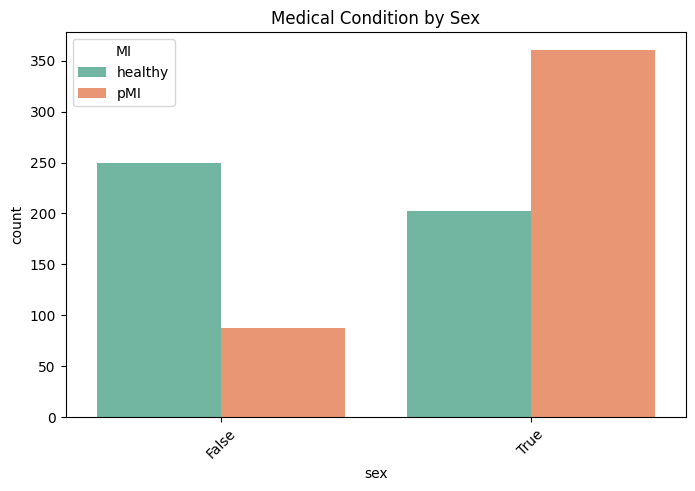

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df_to_explore,
    x='sex',
    hue='MI',
    palette='Set2'
)
plt.title('Medical Condition by Sex')
plt.xticks(rotation=45)
plt.show()

#false is female

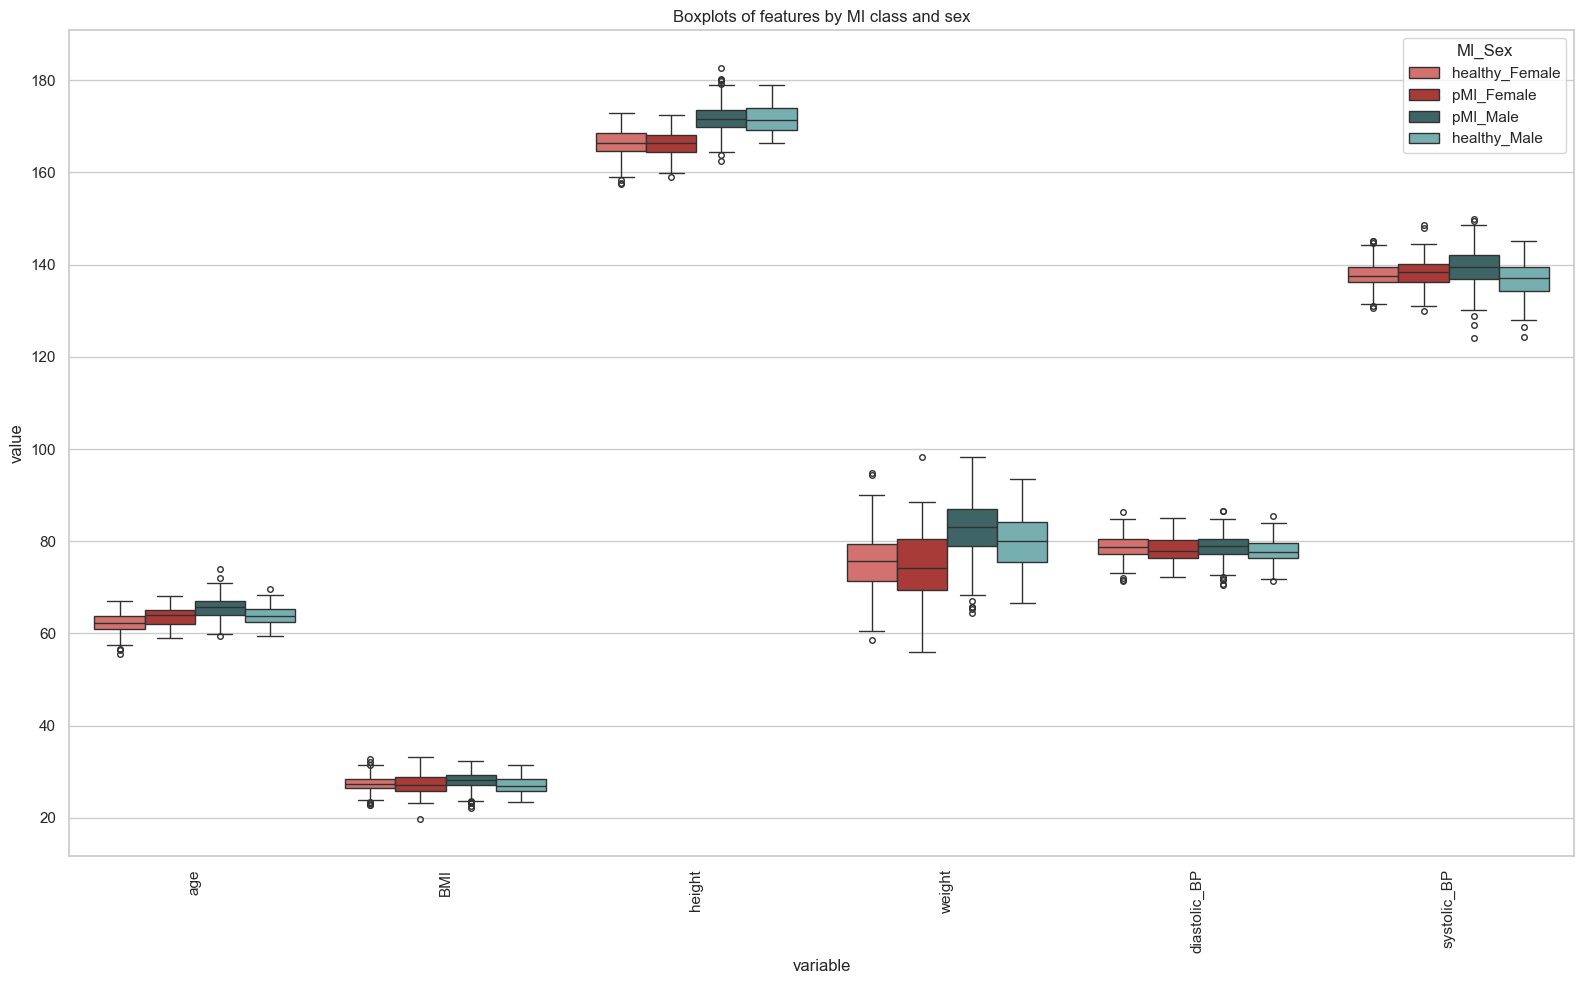

In [54]:
#splitting by male and female - boxplot of features by MI class
# First, melt the data so Seaborn can handle multiple numeric columns
palette = {
    "pMI_Male":   "#376A6C",   #  
    "healthy_Female": "#E3615C",   #  
    "pMI_Female":   "#BB2A25", #  
    "healthy_Male": "#6EB8BA", # 
    
}

melted = df_to_explore.melt(
    id_vars=["MI", "sex"],
    value_vars=numeric_feature_columns,
    var_name="variable",
    value_name="value"
)

# Combine MI and sex to create grouped boxes
melted["MI_sex"] = melted["MI"].astype(str) + "_" + melted["sex"].astype(str)

plt.figure(figsize=(16, 10))
sns.boxplot(
    data=melted,
    x="variable",
    y="value",
    hue="MI_sex",          # color by combined MI/sex group
    fliersize=4,
    palette=palette,
    dodge=True             # separate boxes side-by-side
)

plt.title("Boxplots of features by MI class and sex")
plt.xticks(rotation=90)
plt.legend(title="MI_Sex")
plt.tight_layout()
plt.show()

In [26]:
#exploring proportions of each class in the data
# find proportion of each class in the data
value_counts = df_to_explore['MI'].value_counts()

# Calculate the proportion of each value
proportions = value_counts / len(df_to_explore)

# Display the result
print(proportions)


MI
healthy    0.502222
pMI        0.497778
Name: count, dtype: float64


Text(0.5, 1.0, 'Class proportions in the dataset')

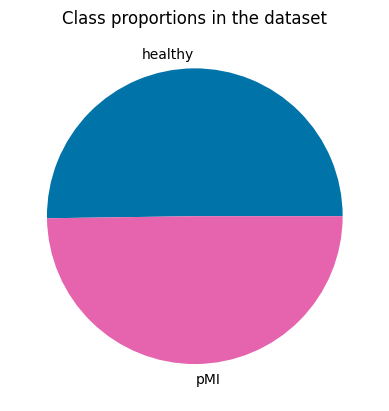

In [27]:
#proportions as a pie chart 
plt.figure()
plt.pie(proportions, labels = ['healthy','pMI'],colors=['#0073a8', '#e564ad'])
plt.title('Class proportions in the dataset')


<Axes: >

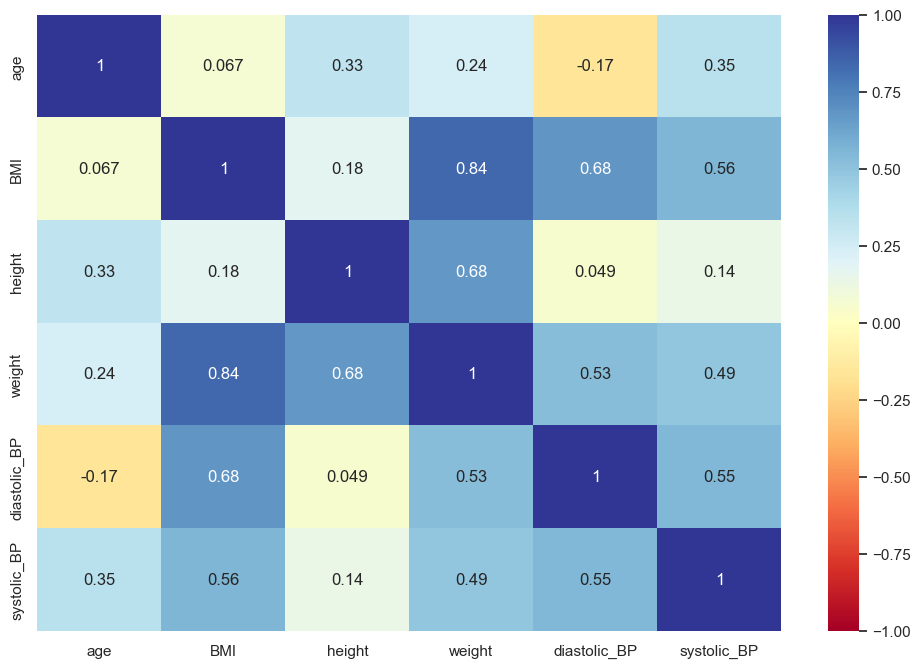

In [56]:
plt.figure(figsize=(12,8))
#pick diverging colourmap
sns.heatmap(df_to_explore[numeric_feature_columns].corr(), annot=True, cmap='RdYlBu', vmin = -1, vmax =1)

To note: BMI and Weight are highly correlated 

#### Exploring the point cloud data 